In [2]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
# To install this module, run:
# python -m pip install Pillow
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person

In [3]:
# This key will serve all examples in this document.
KEY = "0fd16d0913264b32a5288b3930713ec7"

# This endpoint will be used in all examples in this quickstart.
ENDPOINT = "https://faceverifysk.cognitiveservices.azure.com/"

In [4]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

In [5]:
image = open(r"C:\Users\M1061065\OneDrive - Mindtree Limited\Pictures\Camera Roll\WIN_20220103_14_17_32_Pro.jpg", 'rb')
detected_faces1 = face_client.face.detect_with_stream(image, detection_model='detection_03')
source_image1_id = detected_faces1[0].face_id
print('{} face(s) detected from image {}.'.format(len(detected_faces1), "frame0.jpg" ))

1 face(s) detected from image frame0.jpg.


In [17]:
image1 = open(r"C:\Users\M1061065\OneDrive - Mindtree Limited\Pictures\Camera Roll\WIN_20220103_14_17_20_Pro.jpg", 'rb')
detected_faces2 = face_client.face.detect_with_stream(image1, detection_model='detection_03')
source_image2_id = detected_faces2[0].face_id
print('{} face(s) detected from image {}.'.format(len(detected_faces2), "frame6.jpg"))

1 face(s) detected from image frame6.jpg.


In [18]:
verify_result_same = face_client.face.verify_face_to_face(source_image1_id, source_image2_id)
print('Faces from {} & {} are of the same person, with confidence: {}'
    .format("frame0.jpg", "frame6.jpg", verify_result_same.confidence)
    if verify_result_same.is_identical
    else 'Faces from {} & {} are of a different person, with confidence: {}'
        .format("frame0.jpg", "frame6.jpg", verify_result_same.confidence))

Faces from frame0.jpg & frame6.jpg are of a different person, with confidence: 0.33322


In [10]:
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))


In [11]:
url = r"C:\Users\M1061065\OneDrive - Mindtree Limited\Pictures\Camera Roll\WIN_20220103_14_17_32_Pro.jpg"
img = Image.open(url)
print('Drawing rectangle around face... see popup for results.')
draw = ImageDraw.Draw(img)
for face in detected_faces1:
    draw.rectangle(getRectangle(face), outline='red')

# Display the image in the default image browser.
img.show()

Drawing rectangle around face... see popup for results.


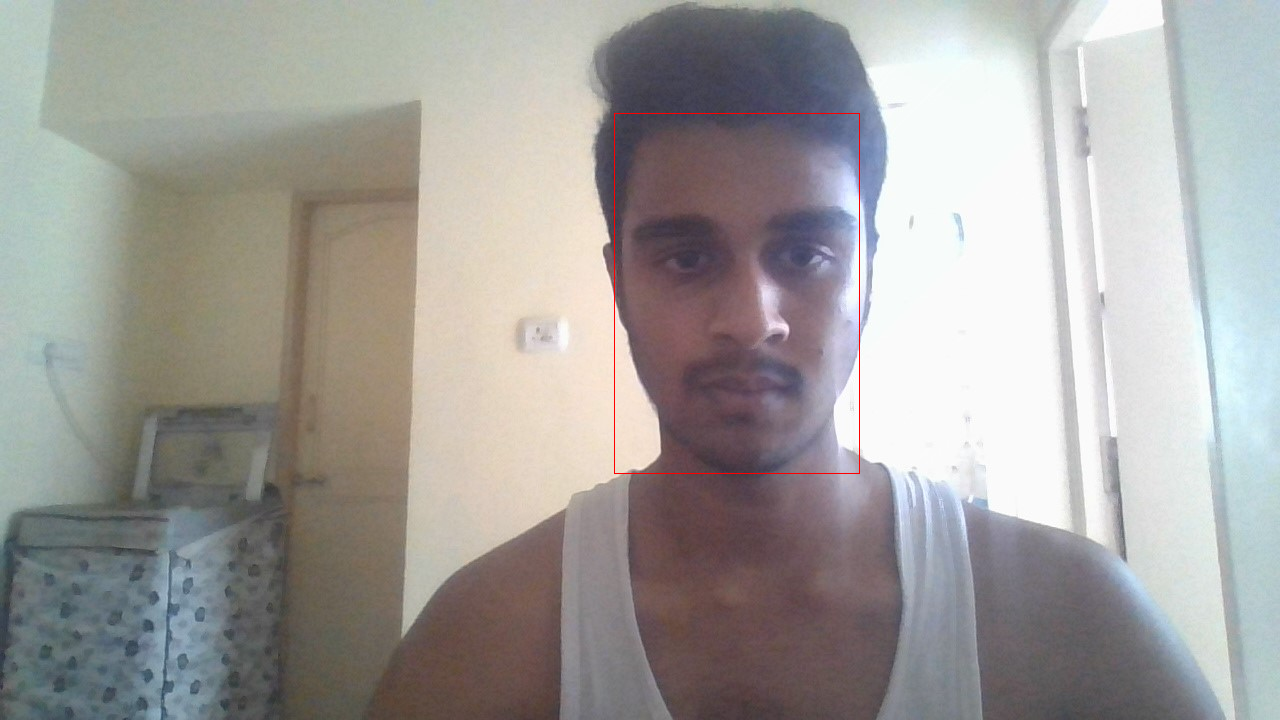

In [12]:
img

In [13]:
url = r"C:\Users\M1061065\OneDrive - Mindtree Limited\Pictures\Camera Roll\WIN_20220103_14_17_20_Pro.jpg"
imag = Image.open(url)
print('Drawing rectangle around face... see popup for results.')
draw = ImageDraw.Draw(imag)
for face in detected_faces2:
    draw.rectangle(getRectangle(face), outline='red')

Drawing rectangle around face... see popup for results.


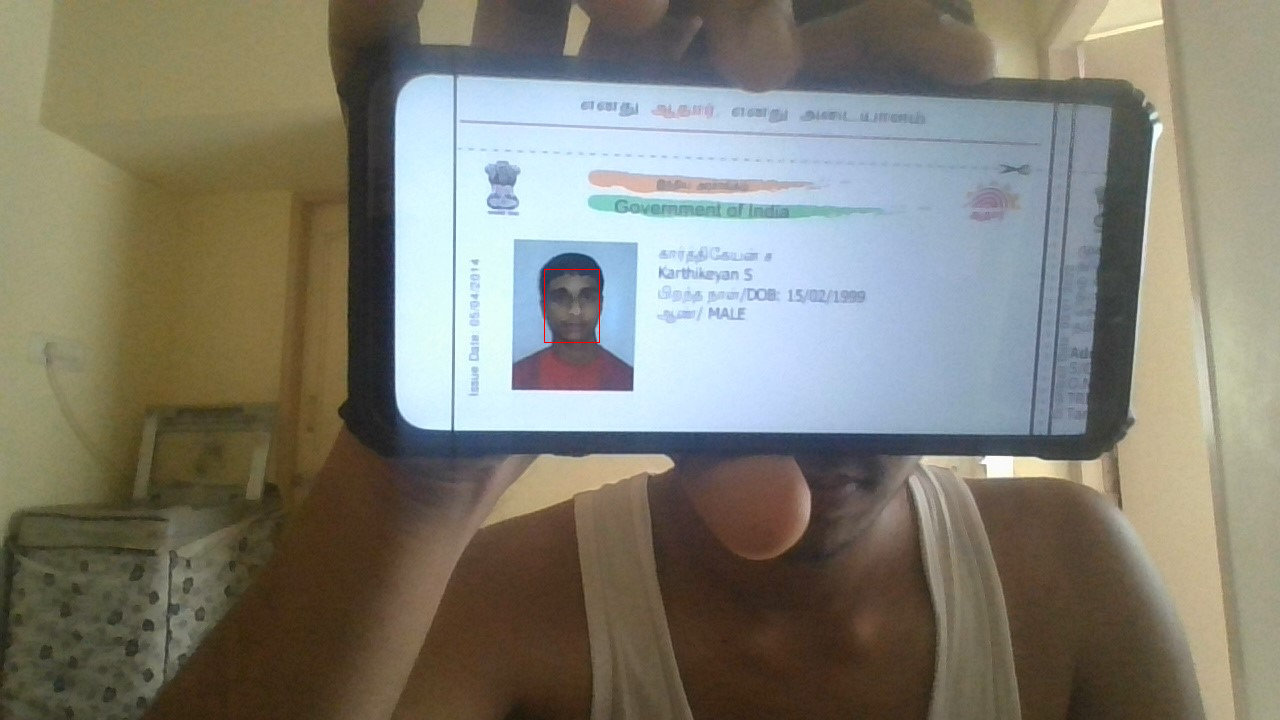

In [14]:
imag